In [5]:
# %pip install kagglehub --quiet
import kagglehub
import shutil
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

### Downloading the data

This script downloads the Animals10 dataset and organizes it into a flat directory structure. It renames the Italian class folder names to English using a translation dictionary. Finally, it creates a Pandas DataFrame with image file paths and their corresponding labels for training.

In [ ]:
path = kagglehub.dataset_download("alessiocorrado99/animals10")

translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "ragno": "spider",
    "scoiattolo": "squirrel",
}

os.makedirs("./data", exist_ok=True)
shutil.move(path, "./data")
for directory in os.listdir("./data/2/raw-img"):
    full_path = os.path.join("./data/2/raw-img", directory)
    if os.path.isdir(full_path):
        shutil.move(full_path, "./data")
shutil.rmtree("./data/2")

for folder in os.listdir("./data"):
    full_path = os.path.join("./data", folder)
    if os.path.isdir(full_path):
        new_folder_name = translate.get(folder, folder)
        new_full_path = os.path.join("./data", new_folder_name)
        if new_full_path != full_path:
            os.rename(full_path, new_full_path)

print("Dataset downloaded and organized in './data' directory.")

100%|██████████| 586M/586M [00:07<00:00, 84.1MB/s] 

Extracting files...


Dataset downloaded and organized in './data' directory.


In [9]:
file_names = []
labels = []

for folder in os.listdir("./data"):
    for file in os.listdir(os.path.join("./data", folder)):
        full_path = os.path.join("./data", folder, file)
        if os.path.isfile(full_path):
            file_names.append(full_path)
            labels.append(folder)

meta_data = pd.DataFrame({
    'file_path': file_names,
    'label': labels
})
meta_data['label'] = meta_data['label'].astype('category')
meta_data.head(10)

,file_path,label
0,./data\butterfly\e030b20928e90021d85a5854ee454...,butterfly
1,./data\butterfly\e030b20929e90021d85a5854ee454...,butterfly
2,./data\butterfly\e030b2092be90021d85a5854ee454...,butterfly
3,./data\butterfly\e030b2092ce90021d85a5854ee454...,butterfly
4,./data\butterfly\e030b2092de90021d85a5854ee454...,butterfly
5,./data\butterfly\e030b20a20e90021d85a5854ee454...,butterfly
6,./data\butterfly\e132b60e2af51c22d2524518b7444...,butterfly
7,./data\butterfly\e134b50a2efc1c22d2524518b7444...,butterfly
8,./data\butterfly\e830b30a20f5003ed1584d05fb1d4...,butterfly
9,./data\butterfly\e830b30a20f6033ed1584d05fb1d4...,butterfly


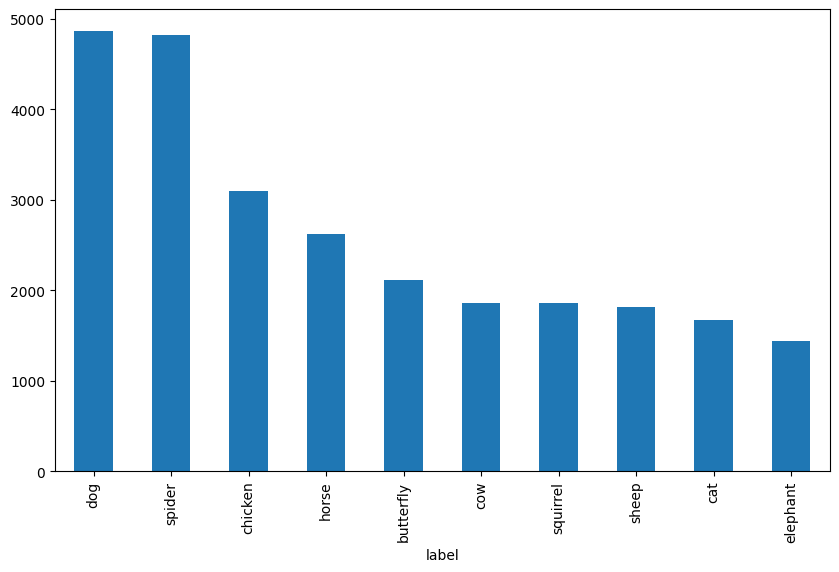

In [12]:
meta_data["label"].value_counts().plot(kind='bar', figsize=(10, 6));